<a href="https://colab.research.google.com/github/alexsimas07/Analisededados/blob/main/Estudo_caso4_Engenharia_de_atributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engenharia de Atributos
## Continuação da Atividade prática - Estudo 4



In [36]:
# Versão da Linguagem Python
from platform import python_version
print("Versão da Linguagem Python usada neste Colab Notebook: ", python_version())

Versão da Linguagem Python usada neste Colab Notebook:  3.7.13


In [37]:
# Instalando o pacote watermark
!pip install -q -U watermark

In [38]:
# Imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
# Versão dos pacotes usados neste Colab Notebook
%reload_ext watermark
%watermark -a "Analista - Alexsander Maia Simas" --iversions

Author: Analista - Alexsander Maia Simas

seaborn   : 0.11.2
pandas    : 1.3.5
numpy     : 1.21.6
matplotlib: 3.2.2
scipy     : 1.7.3



#### Carregando o dataset

In [40]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

In [41]:
df.shape

(11000, 12)

In [42]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [44]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [45]:
# Variáveis numéricas
nums = ['numero_chamadas_cliente', 'avaliacao_cliente',
        'custo_produto', 'compras_anteriores', 'desconto',
        'peso_gramas']

In [46]:
# Variáveis categóricas
cats = ['corredor_armazem', 'modo_envio',
        'prioridade_produto', 'genero']

In [47]:
# Variável Alvo(target)
target = ['entregue_no_prazo']

In [48]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [49]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [50]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [51]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

### Limpeza de Dados
Tratamento de valores ausentes

In [52]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [53]:
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de valores Duplicados
Valores duplicados significam duplicidade dos dados em toda a linha(todo o registro)

In [54]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [55]:
df.duplicated().sum()

0

### Tratamento de valores Outliers
Ler o manual em PDF com a definição do que é o Z-SCORE e a definição de valor outlier.
O tratamento pode ser feito antes, durante ou depois da Engenharia de atributos.

In [56]:
print(f'Número de linhas antes de filtrar valores extremos(outliers):{len(df)}')

Número de linhas antes de filtrar valores extremos(outliers):11000


In [57]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [58]:
df.desconto.mean()

13.372545454545454

In [59]:
df.desconto.std()

16.20494287359376

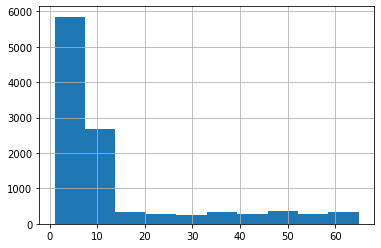

In [60]:
df.desconto.hist()

In [61]:
# Calcula os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior
limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print("Valor superior:", limite_superior)
limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print("Valor inferior:", limite_inferior)

Valor superior: 61.987374075326734
Valor inferior: -35.24228316623583


In [62]:
# Extra os registro com outliears na coluna desconto
df_outliear_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliear_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [63]:
# Filtra o dataframe removendo os registros com outliears na coluna desconto
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [64]:
print(f'Número de linhas depois de filtrar valores extremos (outliers): {len(df)}')

Número de linhas depois de filtrar valores extremos (outliers): 10819


In [65]:
registros = np.array([True] * len(df))

In [66]:
type(registros)

numpy.ndarray

In [67]:
np.count_nonzero(registros == True)

10819

In [68]:
np.count_nonzero(registros == False)

0

In [69]:
# Variáveis numéricas (sem a variável desconto)
num2 = ['numero_chamadas_cliente', 'avaliacao_cliente',
        'compras_anteriores', 'custo_produto', 'peso_gramas']

In [70]:
# Loop por cada variável numérica
for col in num2:

  # Calcula o z-score absoluto
  zscore = abs(stats.zscore(df[col]))

  # Mantém valores com menos de 3 z-score absoluto
  registros = (zscore < 3) & registros 

In [71]:
np.count_nonzero(registros == True)

10643

In [72]:
np.count_nonzero(registros == False)

176

In [73]:
# removendo registros com o z-score abaixo de 3 nas colunas numéricas
df = df[registros]

In [74]:
print(f'Números de linhas após filtrar valores extremos (outliers): {len(df)}')

Números de linhas após filtrar valores extremos (outliers): 10643


### Tratamento de Desbalanceamento de Classe
Deve ser feito nos dados de treino, após o pré-processamento de dados.

In [75]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [76]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

## Engenharia de Atributos
### Feature Selection
Aqui tomamos a decisão sobre quais variáveis serão usadas na Engenharia de Atributos.

In [77]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [78]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
932,933,A,Caminhao,3,5,242,3,media,F,3,2268,1
2898,2899,D,Navio,4,2,180,3,baixa,M,22,1261,1
6347,6348,F,Navio,4,4,198,2,baixa,M,6,5520,0
6651,6652,B,Navio,4,3,123,4,media,M,6,4166,0
9422,9423,A,Navio,2,1,181,5,media,M,3,1038,0


In [79]:
# Correlação
df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


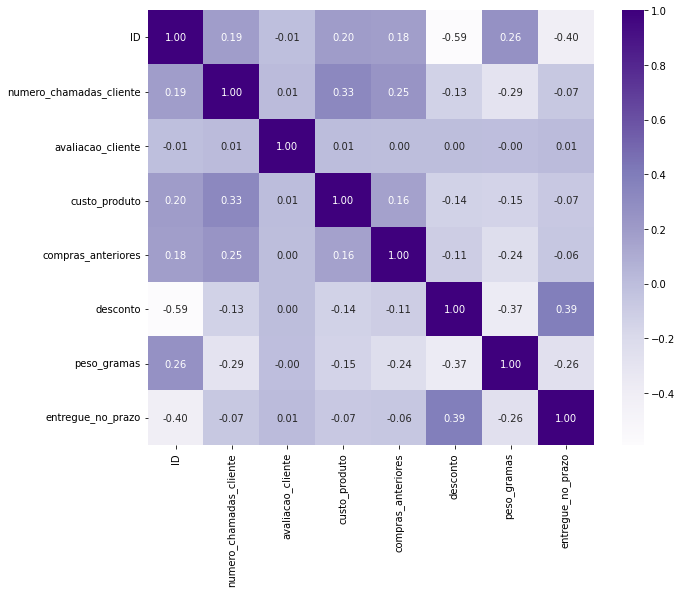

In [80]:
# Criando mapa de correlação, pois gráfico é melhor que números
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f');

##### Decisão: 
Na figura acima, os recursos que ultrapassaram o limite(+/-0,05) na correlação com o recurso de destino(entregue_no_prazo) serão escolhidos para serem processados na Engenharia de Atributos, neste caso: nummero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas.

A variável ID será descartada, pois não representa informação útil. E a avaliacao_cliente não parece relevante.

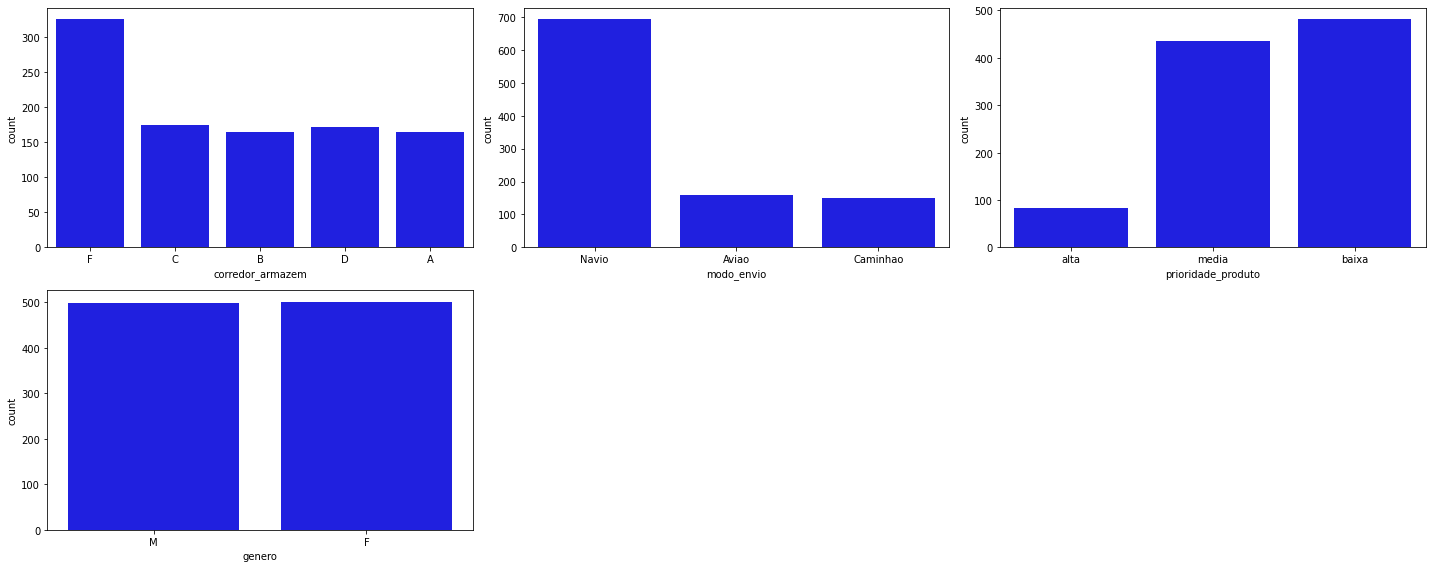

In [81]:
# gráfico de Barras
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20,8))
for i in range (0, len(cats)):
  plt.subplot(2, 3, i + 1)
  sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
  plt.tight_layout()

#### Decisão:
Na figura acima pode-se ver que todas as variáveis categóricas têm uma diferença grande em termos de contagens das classes, exceto a variável de Gênero. Sendo assim, não vamos considerar a variável genero na Engenharia de Atributos.


Como as tarefas são complexas, demonstraremos apenas com algumas colunas. Fique à vontade para refazer a Engenharia de Atributos usando todas as colunas selecionadas conforme regras definidas acima. 

### Feature Extraction
Aqui fazemos a extração de novas variáveis a partir da informação contida em outras variáveis. 

In [82]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [83]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [84]:
# Criar uma cópia do dataframe
df_eng = df.copy()

In [85]:
df_eng.shape

(10643, 12)

In [86]:
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### 1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [87]:
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [88]:
# Criamos a variável e preenchemos com nan
df_eng['performance_prioridade_envio'] = np.nan

In [89]:
# ATENÇÃO!!! Apenas para compreender o conceito !!!
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Ruim", "Excelente")

In [90]:
df_eng['performance_prioridade_envio'].value_counts()

Excelente    10333
Ruim           310
Name: performance_prioridade_envio, dtype: int64

In [91]:
# Agora sim a solução!!!
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico',
  np.where(
      (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático',
  np.where(
      (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável',
      "Não houve Atraso")))

In [92]:
df_eng['performance_prioridade_envio'].value_counts()

Não houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [93]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
9009,9010,B,Navio,3,5,204,4,baixa,M,6,4879,1,Não houve Atraso
10461,10462,B,Navio,5,4,260,5,baixa,M,5,1370,0,Atraso Tolerável
9022,9023,C,Caminhao,5,4,140,3,media,M,4,4623,0,Atraso Problemático
6492,6493,D,Navio,6,1,300,5,baixa,F,10,1787,0,Atraso Tolerável
9967,9968,F,Navio,5,4,266,2,media,M,1,5494,0,Atraso Problemático


In [94]:
# Agrupamos os dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio',
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não houve Atraso,1,6282


In [95]:
# Ajustando os nomes das colunas
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não houve Atraso,1,6282


In [96]:
# Pivot
df_report1 = pd.pivot_table(df_report1,
                            index = 'performance_prioridade_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não houve Atraso,NaN,6282.0


### 2- Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.


In [97]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [98]:
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [108]:
# Solução
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

In [109]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
8460,8461,D,Navio,3,5,167,2,media,F,8,5083,0,Não Houve atraso,Atraso Problemático na Entrega Por Navio
5813,5814,F,Navio,4,5,274,3,media,M,5,4773,0,Não Houve atraso,Atraso Problemático na Entrega Por Navio
4633,4634,F,Caminhao,4,3,134,4,baixa,M,3,5233,0,Não Houve atraso,Atraso Tolerável na Entrega Por Caminhao
1756,1757,C,Caminhao,3,1,262,2,baixa,F,28,2940,1,Não Houve atraso,Não Houve Atraso
4775,4776,F,Caminhao,3,3,265,3,media,F,3,5241,0,Não Houve atraso,Atraso Problemático na Entrega Por Caminhao


In [110]:
df_eng.performance_modo_envio.value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [112]:
# Agrupamos os dados para análise
df_report2 = df_eng.groupby(['performance_modo_envio',
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453


In [113]:
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453
9,Não Houve Atraso,1,6282


In [114]:
# Pivot
df_report2 = pd.pivot_table(df_report2,
                            index = 'performance_modo_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report2.head(10)

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


### Tratando valores NAn

In [115]:
df_report2.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [116]:
# Replace do valor nan por zero
df_report2['Total Atraso'] = df_report2['Total Atraso'].replace(np.nan, 0)
df_report2['Total no Prazo'] = df_report2['Total no Prazo'].replace(np.nan, 0)
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0
9,Não Houve Atraso,0.0,6282.0


In [117]:
# Concatena colunas criando uma terceira variável
df_report2["Total"] = df_report2["Total Atraso"] + df_report2["Total no Prazo"]
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0,51.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0,1453.0
9,Não Houve Atraso,0.0,6282.0,6282.0


In [118]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report2.drop(df_report2.columns[[1, 2]], axis = 1, inplace = True)
df_report2.head(10)

,Status do Envio,Total
0,Atraso Crítico na Entrega Por Aviao,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0
2,Atraso Crítico na Entrega Por Navio,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0
9,Não Houve Atraso,6282.0


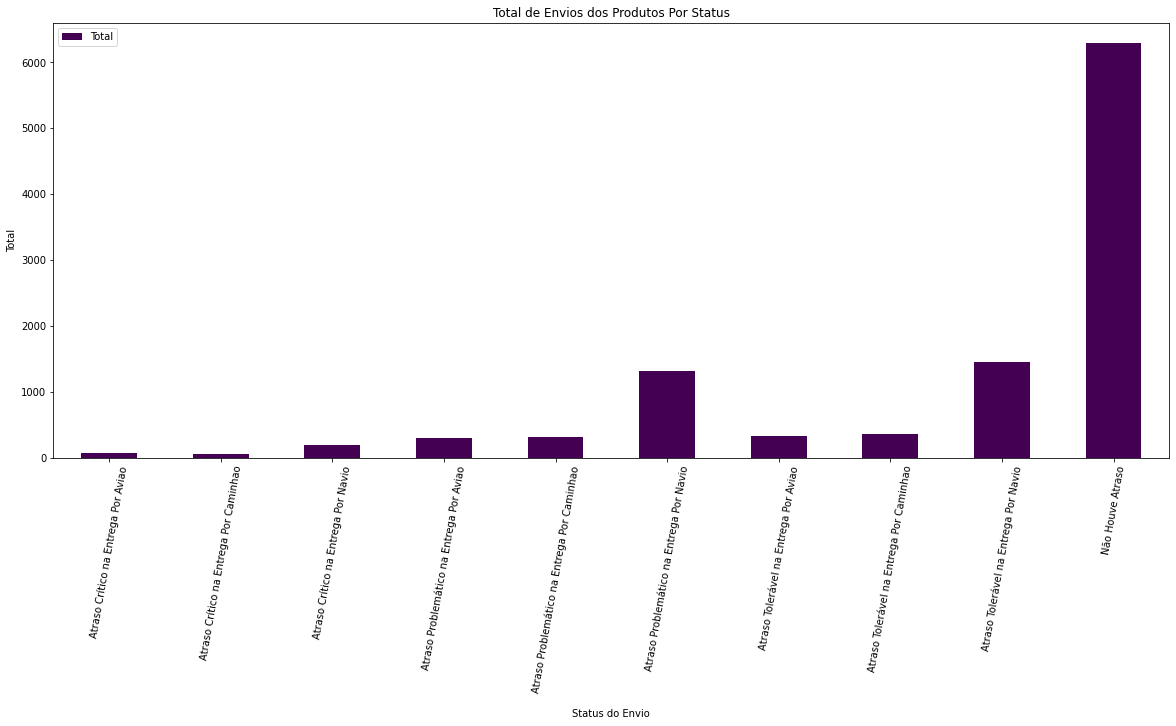

In [119]:
# Plot
df_report2.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'viridis',
                figsize = (20,8))
plt.xticks(rotation = 80)
plt.show()

### 3- Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Criaremos duas novas variáveis com base na seguinte regra de negócio:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [121]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
10352,10353,A,Navio,3,2,214,2,media,F,9,4512,0,Não Houve atraso,Atraso Problemático na Entrega Por Navio
5977,5978,F,Navio,4,2,252,3,media,F,4,5782,0,Não Houve atraso,Atraso Problemático na Entrega Por Navio
7950,7951,D,Aviao,5,2,262,5,baixa,M,5,1751,0,Não Houve atraso,Atraso Tolerável na Entrega Por Aviao
4070,4071,A,Navio,4,4,129,6,media,F,7,4873,1,Não Houve atraso,Não Houve Atraso
3540,3541,D,Caminhao,4,5,154,4,media,M,7,4938,0,Não Houve atraso,Atraso Problemático na Entrega Por Caminhao


In [122]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio'],
      dtype='object')

In [123]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [124]:
# Variável 1
df_eng['faixa_desconto'] = np.where(df_eng.desconto >= 12, "Desconto Acima da Media", "Desconto Abaixo da Media") 

In [125]:
df_eng['faixa_desconto'].value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [126]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto
3412,3413,C,Caminhao,3,2,172,2,baixa,F,9,4532,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media
2835,2836,B,Navio,3,3,186,3,baixa,M,24,3262,1,Não Houve atraso,Não Houve Atraso,Desconto Acima da Media
7217,7218,F,Navio,7,4,251,5,baixa,M,3,1433,0,Não Houve atraso,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media
3139,3140,F,Caminhao,5,3,277,3,media,M,1,4186,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media
4398,4399,D,Aviao,3,3,203,3,media,M,7,4977,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media


In [127]:
# Variável 2
df_eng['performance_faixa_desconto'] = np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Acima da Media", 
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Abaixo da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Acima da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Abaixo da Media",
   "NA"))))

In [128]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
3259,3260,F,Navio,3,3,202,3,media,F,8,5486,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
524,525,A,Caminhao,5,2,154,3,baixa,M,40,1238,1,Não Houve atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
553,554,F,Aviao,2,3,257,4,media,F,52,2073,1,Não Houve atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
9437,9438,F,Caminhao,5,5,275,3,baixa,F,9,1691,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
7176,7177,D,Navio,7,5,282,5,baixa,M,8,1091,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media


In [129]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [130]:
# Agrupamos os dados para análise
df_report3 = df_eng.groupby(['performance_faixa_desconto', 
                             'entregue_no_prazo']).agg({'ID': ['count']}).reset_index()
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,ID
,,,count
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [131]:
df_report3.columns = ['performance_faixa_desconto', 'entregue_no_prazo', 'contagem']
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,contagem
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [132]:
# Pivot
df_report3 = pd.pivot_table(df_report3,
                             index = 'performance_faixa_desconto',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report3.head()

entregue_no_prazo,performance_faixa_desconto,0,1
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [133]:
df_report3.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [134]:
# Replace do valor nan por zero
df_report3['Total Atraso'] = df_report3['Total Atraso'].replace(np.nan, 0)
df_report3['Total no Prazo'] = df_report3['Total no Prazo'].replace(np.nan, 0)
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0


In [135]:
# Concatena colunas criando uma terceira variável
df_report3["Total"] = df_report3["Total Atraso"] + df_report3["Total no Prazo"]
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0,2374.0


In [136]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report3.drop(df_report3.columns[[1, 2]], axis = 1, inplace = True)
df_report3.head()

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,3908.0
2,Entrega no Prazo com Desconto Acima da Media,2374.0


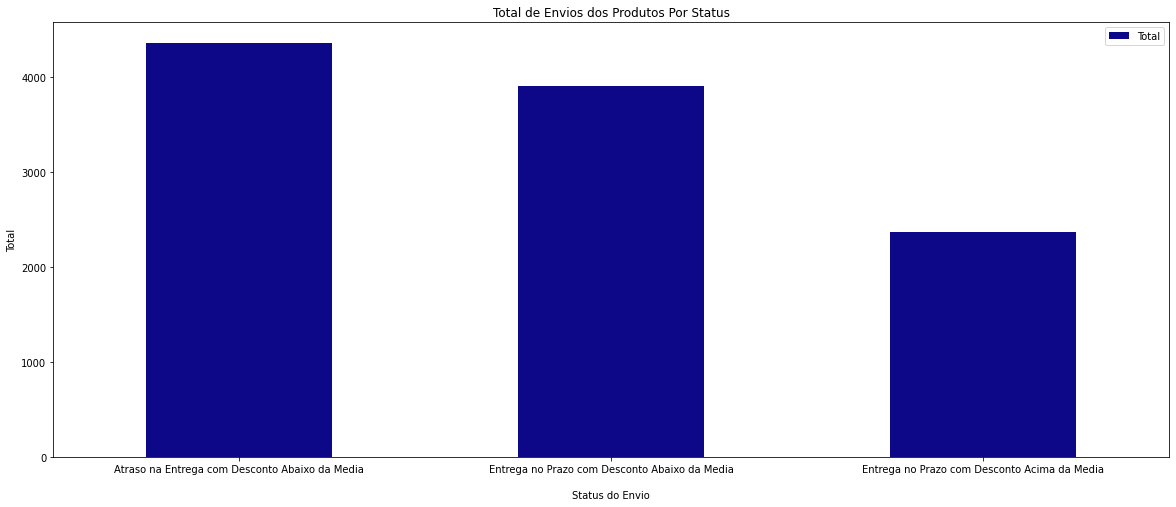

In [137]:
# Plot
df_report3.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'plasma',
                figsize = (20,8))
plt.xticks(rotation = 0)
plt.show()

In [138]:
df_eng.sample(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
9950,9951,A,Navio,5,2,238,5,baixa,F,4,1962,0,Não Houve atraso,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
2082,2083,D,Navio,5,4,215,2,media,M,34,2713,1,Não Houve atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
7861,7862,F,Navio,4,2,255,3,baixa,F,8,5865,0,Não Houve atraso,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
4295,4296,F,Navio,6,5,185,3,alta,F,1,5399,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
7330,7331,C,Navio,4,1,200,3,baixa,M,5,4686,0,Não Houve atraso,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
2191,2192,F,Aviao,4,2,139,4,baixa,F,41,1511,1,Não Houve atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2943,2944,B,Navio,4,3,259,3,alta,M,45,3761,1,Não Houve atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
7634,7635,A,Navio,5,1,230,4,media,M,4,5363,0,Não Houve atraso,Atraso Problemático na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
5438,5439,A,Navio,4,4,263,4,media,M,7,4041,1,Não Houve atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4294,4295,C,Navio,3,4,253,3,alta,F,8,5857,0,Atraso crítico na entrega por Navio,Atraso Crítico na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media


In [140]:
# Salva o dataframe
df_eng.to_csv('df_eng.csv', sep = ',', encoding = 'utf-8')